# Bachelor Programmierkurs 2016
In diesem Notebook sollen die grundlegenden Konzepte von ROOT vermittelt werden.

### Erstellung und Speicherung eines Pseudodatensatzes

In [1]:
import ROOT
import numpy as np

import os

import matplotlib.pyplot
%matplotlib inline

Welcome to ROOTaaS 6.06/00


In [2]:
filename = 'MyFirstROOTFile.root'
treename = 'TestTree'
dataPath = 'Data'

# Erstelle einen Ordner, in welchem die angefertigten Trees gespeichert werden können (aber nur, wenn nötig!)
if not os.path.exists(dataPath):
    os.makedirs(dataPath)

numDataPoints = 10000

print('Writing a tree ...')

myFile = ROOT.TFile(os.path.join(dataPath, filename), 'RECREATE')
myTree = ROOT.TTree(treename, 'my frist created ROOT tree')

# Erstelle Platzhaltervariablen 
uniform = np.zeros((1), dtype=np.float64)
normal = np.zeros((1), dtype=np.float64)
prod = np.zeros((1), dtype=np.float64)

# Erstelle Branches, welche gefüllt werden sollen ('/D' steht für den Datentypen, hier Double)
myTree.Branch('uniform', uniform, 'uniform/D')
myTree.Branch('normal', normal, 'normal/D')
myTree.Branch('prod', prod, 'prod/D')

# Fülle die Branches
for _ in xrange(numDataPoints):
    uniform[0] = ROOT.gRandom.Uniform() 
    normal[0] = ROOT.gRandom.Gaus()
    prod[0] = uniform[0] * normal[0]
    myTree.Fill()

# Speichere die File
myFile.Write("", ROOT.TObject.kOverwrite)
myFile.Close()

print('Done!')

Writing a tree ...
Done!


### Einlesen eines Trees und Plotten von Variablen

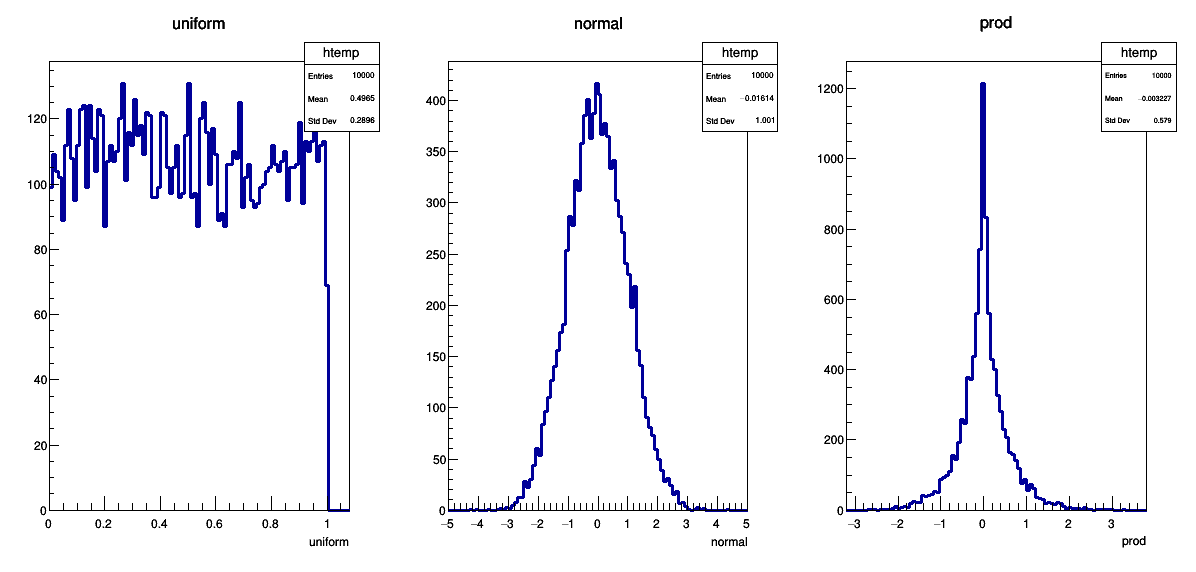

Info in <TCanvas::Print>: pdf file Plots/Overview_Plot.pdf has been created


In [3]:
plotPath = 'Plots'

# Erstelle einen Ordner, in welchem die angefertigten Plots gespeichert werden können (aber nur, wenn nötig!)
if not os.path.exists(plotPath):
    os.makedirs(plotPath)

# Lese die Datei und den Tree ein
myFile = ROOT.TFile(os.path.join(dataPath, filename))
myTree = myFile.Get(treename)

# Erstelle ein TCanvas, auf welchem Plots erstellt werden können
myCan = ROOT.TCanvas('can', 'can', 1200, 600)
myCan.Divide(3, 1)

# Plotte auf das TCanvas
myCan.cd(1)
myTree.Draw('uniform')

myCan.cd(2)
myTree.Draw('normal')

myCan.cd(3)
myTree.Draw('prod')

# Male (auf) das TCanvas
myCan.Draw()

# Speichere den Plot als PDF
myCan.SaveAs(os.path.join(plotPath, 'Overview_Plot.pdf'))

Es lassen sich auch relativ einfach verschiedene verschiedene Kombinationen der einzelnen TBranches plotten

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: can


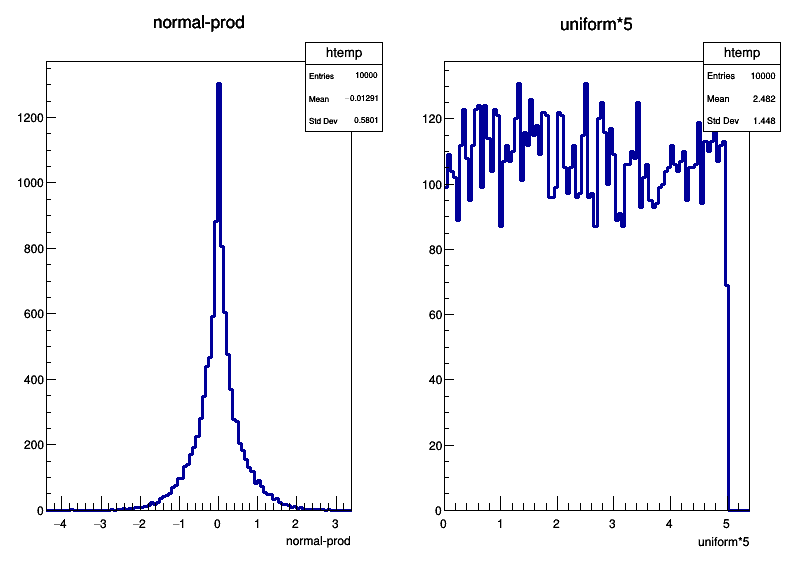

Info in <TCanvas::Print>: pdf file Plots/Some_Combination_Plot.pdf has been created


In [4]:
myCan = ROOT.TCanvas('can', 'can', 800, 600)
myCan.Divide(2, 1)

myCan.cd(1)
myTree.Draw('normal-prod')

myCan.cd(2)
myTree.Draw('uniform*5')

myCan.Draw()
myCan.SaveAs(os.path.join(plotPath, 'Some_Combination_Plot.pdf'))

Die `Draw` Methode ist extrem mächtig. Experimentiere einfach selbst etwas damit herum. Die Übergabeparameter sind:
    
    TTree.Draw([String] variable, [String] cut, [String] draw_option, [Int] max_entries, [Int] first_entry)
    
Siehe auch [hier](https://root.cern.ch/doc/master/classTTree.html#a73450649dc6e54b5b94516c468523e45)

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: can


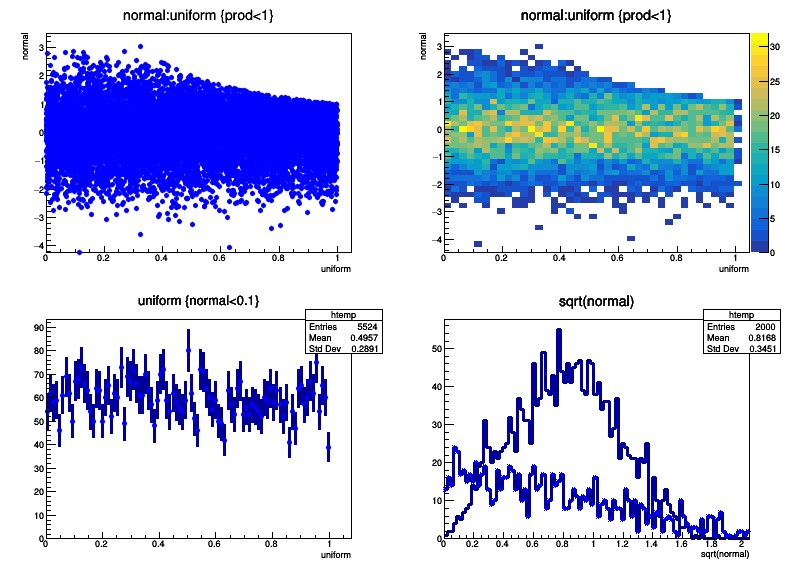

Info in <TCanvas::Print>: pdf file Plots/Draw_Options_Plot.pdf has been created


In [5]:
myCan = ROOT.TCanvas('can', 'can', 800, 600)
myCan.Divide(2, 2)

# 2d-Plots sind ebenfalls möglich. Dies ist ein Scatterplot.
myCan.cd(1)
myTree.Draw('normal:uniform', 'prod<1')

# Verschiedene draw_options machen Plots anschaulicher. Bei 2d Plots lohnt sich zum Beispiel eine 'CONTZ'–Option.
myCan.cd(2)
myTree.Draw('normal:uniform', 'prod<1', 'COLZ')

myCan.cd(3)
myTree.Draw('uniform', 'normal<0.1', 'E')

# Es lassen sich auch verschiedene Verteilungen auf das gleiche TCanvas malen
myCan.cd(4)
myTree.Draw('sqrt(normal)', '', '', 2000)
myTree.Draw('normal', '', 'SAME *H', 2000)

myCan.Draw()

myCan.SaveAs(os.path.join(plotPath, 'Draw_Options_Plot.pdf'))

### Fitten einfacher Funktionen mit ROOT
Eine ausführliche Liste von vordefinierten Fitfunktionen befindet sich [hier](https://root.cern.ch/doc/master/classTF1.html).

In [ ]:
rangeAndBins = {'Bins': 20, 'Min': -3, 'Max': 3}

# Erstelle ein Histogram TH1D (D steht wiederum für Double) und fülle es mit Daten
myHist = ROOT.TH1D('myHist', 'myHist', 
                   rangeAndBins['Bins'], rangeAndBins['Min'], rangeAndBins['Max'])

# Alternativ wie oben: 
# myVal = np.zeros(1, dtype=float)
# myBranch = myTree.GetBranch('normal')
# myBranch.SetAddress(myVal)
# 
# for i in range(myTree.GetEntries()):
#     myBranch.GetEntry(i)
#     myHist.Fill(myVal[0])


# Fülle das Histogram
myTree.Draw('normal>>myHist')

# Erstelle eine Fitfunktion (gaus(0) = [0]*exp(-0.5*((x-[1])/[2])**2)), starte Parameterzählung bei 0
myFitGaussian = ROOT.TF1('myFitFunction', 'gaus(0)', 
                         rangeAndBins['Min'], rangeAndBins['Max'])

# Setze sinvolle Startparameter für [0], [1] und [2]
myFitGaussian.SetParameters(1000, 0, 2)

# Mache den Fit
myFitResultGauss = myHist.Fit('myFitFunction', 'S')

# Setze den Plot Style
#ROOT.gROOT.SetStyle("Pub")
# OBJ: TStyle	Plain	Plain Style (no colors/fill areas)
# OBJ: TStyle	Bold	Bold Style
# OBJ: TStyle	Video	Style for video presentation histograms
# OBJ: TStyle	Pub	Style for Publications
# OBJ: TStyle	Classic	Classic Style
# OBJ: TStyle	Default	Equivalent to Classic
# OBJ: TStyle	Modern	Modern Style

# Plotte die Vertreilung und die Fitkurve
myCan = ROOT.TCanvas('myCan', 'myCan', 800, 600)
# LaTeX mit # statt \
myHist.SetXTitle('#sigma_{t} [fm]')
myHist.SetYTitle('Count')
myHist.Draw()
myFitGaussian.Draw('SAME')

myCan.Draw()
myCan.SaveAs(os.path.join(plotPath, 'Gaussfit_Plot.pdf'))

In [ ]:
# Erhalte einige Informationen über den Fit
print('Gaussfunktion: [0]*exp(-0.5*((x-[1])/[2])**2))\n')

for i in range(3):
    print('Parameter {}: {:.3f} +- {:.3f}'.format(i, 
                                         myFitResultGauss.Parameter(i),
                                         myFitResultGauss.Error(i)
                                        ))
    
print('\nChi2: {:.3f}'.format(myFitResultGauss.Chi2()))

### Manipulation von TTree

Will man sich einen kurzen Überblick über den Inhalt eines `TTree`s verschaffen, so können folgende Methoden hilfreich sein.

In [13]:
filenameNew = 'MyFirstROOTFile_cutted.root'
myCutString = 'normal > 1'

# Anzahl von Einträgen im TTree
myTreeEntries = myTree.GetEntries()
myTreeEntriesOneSigma = myTree.GetEntries('normal > 1')

print('Anzahl Einträge im Tree: {}, Anzahl Einträge nach Cut: {}'.format(
    myTreeEntries, myTreeEntriesOneSigma))
print('Anteil im 1-sigma-Bereich: {:.1%}'.format(float(myTreeEntriesOneSigma)/myTreeEntries))

# Will man einen TTree beschneiden (um ihn z.B. anschließend zu speichern), so ist die Methode CopyTree erwähnenswert
myNewFile = ROOT.TFile(os.path.join(dataPath, filenameNew), 'RECREATE')

myNewTree = myTree.CopyTree(myCutString)

# Speichere die file
myNewFile.Write("", ROOT.TObject.kOverwrite)
myNewFile.Close()

Anzahl Einträge im Tree: 10000, Anzahl Einträge nach Cut: 1590
Anteil im 1-sigma-Bereich: 15.9%


Zur Erinnerung: Die Normalverteilung (auch Gaußsche Normalverteilung) sollte so aussehen:

![Normalverteilung](https://www.onlinelege.no/media/56/gausskurve_600x600.gif)

In [ ]:
ROOT.gROOT.GetListOfStyles()